# Case Study 5 - Bank Reviews Complaint Analysis

In [38]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
Bank_reviews = pd.read_excel('E:/BankReviews.xlsx')

In [4]:
Bank_reviews.head()

,Date,Stars,Reviews,BankName
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage
1,2017-02-10,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage
2,2017-08-21,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage
3,2017-12-17,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage
4,2016-05-27,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage


In [5]:
# Dropping the irrelevant variables
Bank_reviews.drop(['Date','BankName'],axis=1,inplace=True)

In [6]:
Bank_reviews.head()

,Stars,Reviews
0,5,"Great job, Wyndham Capital! Each person was pr..."
1,5,Matthew Richardson is professional and helpful...
2,5,We had a past experience with Wyndham Mortgage...
3,5,We have been dealing with Brad Thomka from the...
4,5,I can't express how grateful I am for the supp...


In [8]:
Bank_reviews.shape

(505, 2)

In [9]:
X,Y = Bank_reviews.Reviews,Bank_reviews.Stars

In [10]:
X.head()

0    Great job, Wyndham Capital! Each person was pr...
1    Matthew Richardson is professional and helpful...
2    We had a past experience with Wyndham Mortgage...
3    We have been dealing with Brad Thomka from the...
4    I can't express how grateful I am for the supp...
Name: Reviews, dtype: object

In [11]:
Y.head()

0    5
1    5
2    5
3    5
4    5
Name: Stars, dtype: int64

In [19]:
import re
corpus = []
for i in range(0, len(X)):
    review = re.sub(r'\W', ' ', str(X[i]))
    review = review.lower()
    review = re.sub(r'^br$', ' ', review)
    review = re.sub(r'\s+[a-z]\s+', ' ',review)
    review = re.sub(r'^[a-z]\s+', '', review)
    review = re.sub(r'\s+', ' ', review)
    corpus.append(review)

In [20]:
X[0]

'Great job, Wyndham Capital! Each person was professional and helped us move through our refinance process smoothly. Thank you!'

In [23]:
corpus[1]

'matthew richardson is professional and helpful he helped us find the correct product for our mortgage thank you very much for the excellent service matthew '

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Mayur
[nltk_data]     Kastiya\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [27]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Mayur
[nltk_data]     Kastiya\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [30]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Mayur
[nltk_data]     Kastiya\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [28]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatization
for i in range(len(corpus)):
    words = nltk.word_tokenize(corpus[i])
    words = [lemmatizer.lemmatize(word) for word in words]
    corpus[i] = ' '.join(words)

In [31]:
# Creating the Tf-Idf model
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 2000, min_df = 0.05, max_df = 0.8, stop_words = stopwords.words('english'))
X = vectorizer.fit_transform(corpus).toarray()

In [32]:
X.shape

(505, 137)

### Logistic Regression

In [34]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y=train_test_split(X, Y, test_size = 0.3, random_state=100)

In [35]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit( train_x, train_y )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
# Train and test accuracy
from sklearn import metrics

train_accuracy = metrics.accuracy_score(train_y,logreg.predict(train_x))
print('Train_accuracy: ',train_accuracy)

Train_accuracy:  0.9065155807365439


In [37]:
test_accuracy = metrics.accuracy_score(test_y,logreg.predict(test_x))
print('Test_accuracy: ',test_accuracy)

Test_accuracy:  0.8947368421052632


### Confusion Matrix

Text(0.5, 15.0, 'Predicted label')

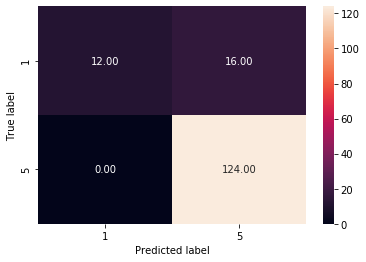

In [39]:
from sklearn import metrics

cm = metrics.confusion_matrix(test_y,
                            logreg.predict(test_x), [1,5] )
cm

sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["1", "5"] , yticklabels = ["1", "5"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

### Prediction

In [40]:
Pred_stars = pd.DataFrame(logreg.predict(X), columns=['Predicted_stars'])
Pred_Bank_reviews = pd.concat([Bank_reviews, Pred_stars], axis=1)

In [41]:
Pred_Bank_reviews.head(10)

,Stars,Reviews,Predicted_stars
0,5,"Great job, Wyndham Capital! Each person was pr...",5
1,5,Matthew Richardson is professional and helpful...,5
2,5,We had a past experience with Wyndham Mortgage...,5
3,5,We have been dealing with Brad Thomka from the...,5
4,5,I can't express how grateful I am for the supp...,5
5,5,I had the pleasure of working with Wyndham Cap...,5
6,5,My experience with Mattison was beyond greatly...,5
7,5,Patrick answered all my questions by email imm...,5
8,5,I loved working with this group of people! The...,5
9,5,Great web interface for both the loan applicat...,5


In [42]:
Pred_Bank_reviews.to_csv('Pred_Bank_reviews.csv',index=False)